In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from part2.alternative_simulations import get_individual_parameter_estimates_model2, get_individual_parameter_estimates_model3

choices = pd.read_csv('data/choices.csv', header=None)
rewards = pd.read_csv('data/rewards.csv', header=None)

In [2]:
parameter_estimates_model2 = get_individual_parameter_estimates_model2(choices, rewards)

In [3]:
parameter_estimates_model3 = get_individual_parameter_estimates_model3(choices, rewards)

/home/mclancy/ccn/coursework2/part2/alternative_simulations.py:66: RuntimeWarning: overflow encountered in exp
  choice_probabilities[i] = np.exp(V[choice_index]) \
/home/mclancy/ccn/coursework2/part2/alternative_simulations.py:67: RuntimeWarning: overflow encountered in exp
  / (np.exp(V[choice_index]) + np.exp(V[int(not choice_index)]))
/home/mclancy/ccn/coursework2/part2/alternative_simulations.py:66: RuntimeWarning: invalid value encountered in double_scalars
  choice_probabilities[i] = np.exp(V[choice_index]) \


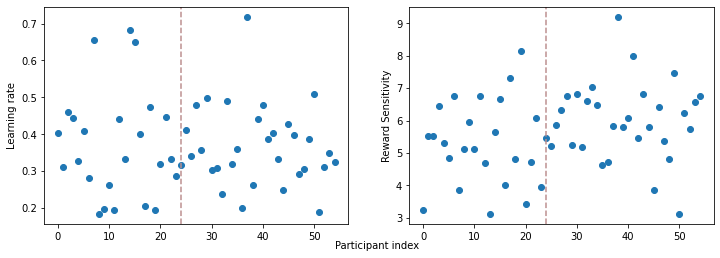

In [21]:
fig, axes = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
axes[0].scatter(parameter_estimates_model2.index, parameter_estimates_model2['learning_rate'])
axes[0].axvline(24, c='rosybrown', linestyle='--')
axes[0].set_ylabel("Learning rate")
axes[1].scatter(parameter_estimates_model2.index, parameter_estimates_model2['inverse_temperature'])
axes[1].axvline(24, c='rosybrown', linestyle='--')
axes[1].set_ylabel("Reward Sensitivity")
fig.text(0.51, 0.04, 'Participant index', ha='center')
fig.savefig('../report/figures/part2/task8/model2_estimated_parameters.pdf')

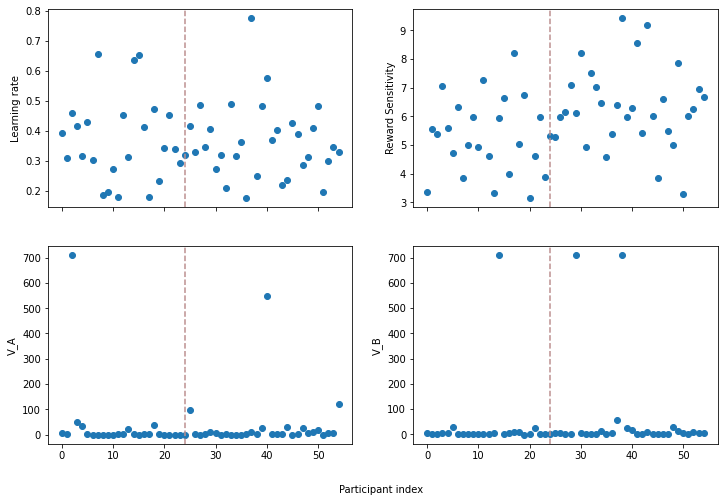

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12,8))
axes[0,0].scatter(parameter_estimates_model3.index, parameter_estimates_model3['learning_rate'])
axes[0,0].axvline(24, c='rosybrown', linestyle='--')
axes[0,0].set_ylabel("Learning rate")
axes[0,1].scatter(parameter_estimates_model3.index, parameter_estimates_model3['inverse_temperature'])
axes[0,1].axvline(24, c='rosybrown', linestyle='--')
axes[0,1].set_ylabel("Reward Sensitivity")

axes[1,0].scatter(parameter_estimates_model3.index, parameter_estimates_model3['V_A'])
axes[1,0].axvline(24, c='rosybrown', linestyle='--')
axes[1,0].set_ylabel("V_A")
axes[1,1].scatter(parameter_estimates_model3.index, parameter_estimates_model3['V_B'])
axes[1,1].axvline(24, c='rosybrown', linestyle='--')
axes[1,1].set_ylabel("V_B")
fig.text(0.51, 0.04, 'Participant index', ha='center')
fig.savefig('../report/figures/part2/task8/model3_estimated_parameters.pdf')

In [28]:
print(parameter_estimates_model2.mean())
print(parameter_estimates_model2.var())

learning_rate          0.368928
inverse_temperature    5.682949
dtype: float64
learning_rate          0.015400
inverse_temperature    1.646639
dtype: float64


In [30]:
print(parameter_estimates_model3.mean())
print(parameter_estimates_model3.var())

learning_rate           0.366546
inverse_temperature     5.862450
V_A                    33.065971
V_B                    44.274731
dtype: float64
learning_rate              0.016956
inverse_temperature        2.102498
V_A                    14412.251618
V_B                    26122.371936
dtype: float64


In [25]:
mdd_paramater_estimates = parameter_estimates_model2[:24]
control_paramater_estimates = parameter_estimates_model2[24:]

ttest_result_2 = ttest_ind(mdd_paramater_estimates, control_paramater_estimates, equal_var=False)

In [26]:
mdd_paramater_estimates = parameter_estimates_model3[:24]
control_paramater_estimates = parameter_estimates_model3[24:]

ttest_result_3 = ttest_ind(mdd_paramater_estimates, control_paramater_estimates, equal_var=False)